In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
# each column represents a single variable in the dataset
studios = top_movies.select('Studio') # categorical variable
studios # we could plot this to represent a categorical distribution via a bar chart

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [4]:
# .group() groups together cases that share a value of a variable
# you can group by different column labels
# in this case, we're grouping by 'Studio'
# the default behavior of this function is to simply count the number of cases that share that value
studio_distribution = studios.group('Studio')

In [5]:
studio_distribution # this is a new table with just two columns:
# 'Studio', with one row per unique value in the 'Studio' column
# 'count', which counts up the number of times that value occurs in the original table
# we could use this table to create a bar chart showing the distribution of studios

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


## Bar Charts ##

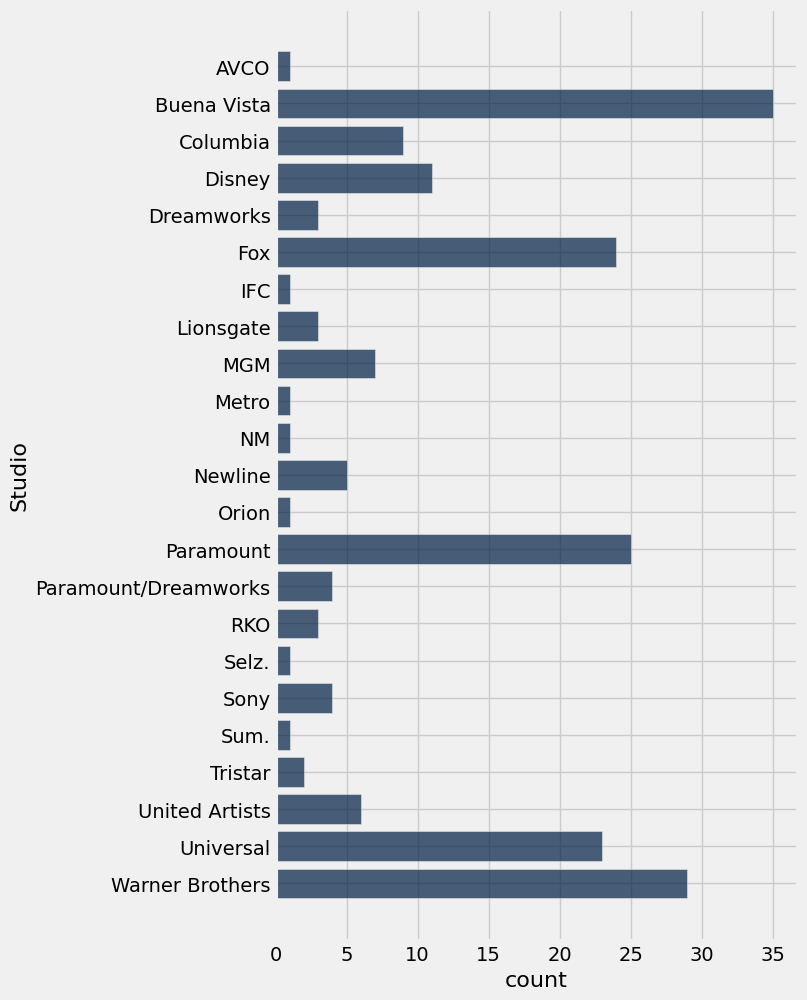

In [6]:
# call .barh() to create a horizontal bar chart
studio_distribution.barh('Studio')
plots.show();

In [7]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [8]:
studio_distribution.sort('count', descending=True)

Studio,count
Buena Vista,35
Warner Brothers,29
Paramount,25
Fox,24
Universal,23
Disney,11
Columbia,9
MGM,7
United Artists,6
Newline,5


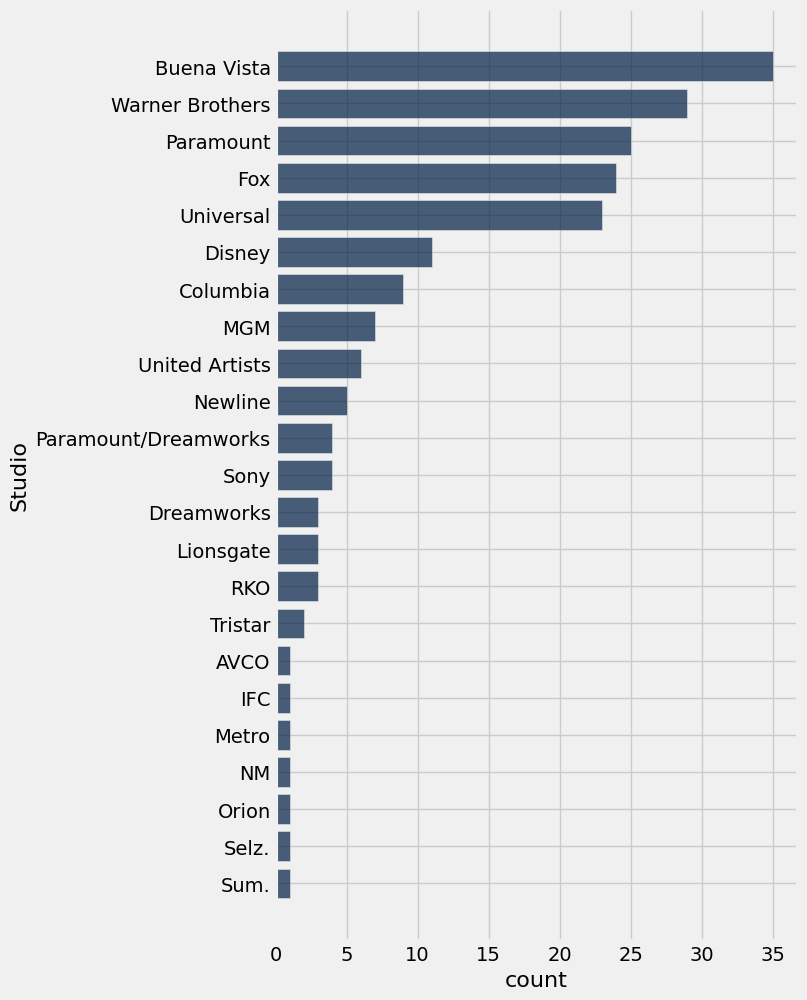

In [9]:
# always recommended: to sort the data before calling .barh()
# this is because, the default behavior of .barh() is to create bars in the order
# that the table is already sorted
# we should sort this by count, which will show a bar chart that is sorted by the length of the bars
studio_distribution.sort('count', descending=True).barh('Studio')
plots.show();

(slides)

## Numerical Distribution ##

In [10]:
# last time, we calculated the "age" of each movie, which is 2026 - year the movie was made
ages = 2026 - top_movies.column('Year') # an array of movie ages
top_movies = top_movies.with_column('Age', ages) # adding that array to the top_movies table to a column called 'Age'

In [11]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,87
Star Wars,Fox,460998007,1583483200,1977,49
The Sound of Music,Fox,158671368,1266072700,1965,61
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,44
Titanic,Paramount,658672302,1204368000,1997,29
The Ten Commandments,Paramount,65500000,1164590000,1956,70
Jaws,Universal,260000000,1138620700,1975,51
Doctor Zhivago,MGM,111721910,1103564200,1965,61
The Exorcist,Warner Brothers,232906145,983226600,1973,53
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,89


In [12]:
# ask questions like, what is the newest movie and what is the oldest movie in the dataset?
# use min() and max() on the ages array to find out
min(ages), max(ages)

(9, 105)

In [13]:
# what is the title of the movie that is 105 years old?
top_movies.sort('Age', descending=True)

Title,Studio,Gross,Gross (Adjusted),Year,Age
The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921,105
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,89
Gone with the Wind,MGM,198676459,1796176700,1939,87
Pinocchio,Disney,84254167,599215600,1940,86
Fantasia,Disney,76408097,738256500,1941,85
Sergeant York,Warner Brothers,16361885,427815200,1941,85
Bambi,RKO,102247150,566403700,1942,84
The Bells of St. Mary's,RKO,21333333,557803900,1945,81
The Best Years of Our Lives,RKO,23650000,488950000,1946,80
Duel in the Sun,Selz.,20408163,453571400,1946,80


In [14]:
top_movies.sort('Age', descending=True).column('Title')

array(['The Four Horsemen of the Apocalypse',
       'Snow White and the Seven Dwarves', 'Gone with the Wind',
       'Pinocchio', 'Fantasia', 'Sergeant York', 'Bambi',
       "The Bells of St. Mary's", 'The Best Years of Our Lives',
       'Duel in the Sun', 'Cinderella (1950)',
       'The Greatest Showman on Earth', 'The Robe', 'House of Wax',
       'Peter Pan', 'Rear Window', 'The Caine Mutiny',
       'Lady and the Tramp', 'The Ten Commandments',
       'Around the World in 80 Days', 'The Bridge on the River Kwai',
       'Ben-Hur', 'Sleeping Beauty', 'Swiss Family Robinson', 'Psycho',
       '101 Dalmatians', 'West Side Story', 'Lawrence of Arabia',
       'Cleopatra (1963)', "It's a Mad, Mad, Mad, Mad World",
       'Mary Poppins', 'Goldfinger', 'My Fair Lady', 'The Sound of Music',
       'Doctor Zhivago', 'Thunderball', 'The Graduate', 'The Jungle Book',
       "Guess Who's Coming to Dinner", '2001: A Space Odyssey',
       'Funny Girl', 'Butch Cassidy and the Sundance Kid', 

In [15]:
top_movies.sort('Age', descending=True).column('Title').item(0) # first item in the sorted 'Title' array

'The Four Horsemen of the Apocalypse'

In [16]:
# I can specify the bins that I want to split my data by
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100) # this is an array of lower bounds

In [17]:
# use .bin() to bin data with pre-defined bins
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,3
10,25
15,39
25,47
40,59
65,26
100,0


In [18]:
np.arange(0, 125, 25) # gives an array from 0 to 125 with a step size of 25

array([  0,  25,  50,  75, 100])

In [19]:
# let's try different bins, this time trying to include the four horsemen movie
top_movies.bin('Age', bins = np.arange(0, 125, 25))

bin,Age count
0,67
25,73
50,49
75,10
100,0


In [20]:
np.arange(0, 126, 25) # we need to go past 125 so that 125 is included in our array

array([  0,  25,  50,  75, 100, 125])

In [21]:
# Have caution when manually choosing bins!
# Data will be cut out if the bins don't cover the whole range of the data
# And remember that np.arange doesn't include the last value, so you need to go a little bit beyond the max value of the data
top_movies.bin('Age', bins = np.arange(0, 126, 25))

bin,Age count
0,67
25,73
50,49
75,10
100,1
125,0


(slides)

## Histograms ##

In [22]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 106) # bins that will include 105, because the highest value is greater than 105
my_bins # these are uneven bins, so the widths between each bin are different, which is fine

array([  0,   5,  10,  15,  25,  40,  65, 106])

In [24]:
top_movies.num_rows

200

In [23]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,3
10,25
15,39
25,47
40,59
65,27
106,0


In [25]:
binned_data.column('Age count') / 200

array([ 0.   ,  0.015,  0.125,  0.195,  0.235,  0.295,  0.135,  0.   ])

In [26]:
(binned_data.column('Age count') / 200) * 100

array([  0. ,   1.5,  12.5,  19.5,  23.5,  29.5,  13.5,   0. ])

In [27]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', (binned_data.column('Age count') / 200) * 100)

In [28]:
binned_data # you won't actually have to manually calculate the percents when plotting a historgram in practice
# but you should know how it is done "under the hood" and perhaps for exam/homework questions

bin,Age count,Percent
0,0,0
5,3,1.5
10,25,12.5
15,39,19.5
25,47,23.5
40,59,29.5
65,27,13.5
106,0,0


In [31]:
Table.hist?

Signature:
Table.hist(
    self,
    *columns,
    overlay=True,
    bins=None,
    bin_column=None,
    unit=None,
    counts=None,
    group=None,
    rug=False,
    side_by_side=False,
    left_end=None,
    right_end=None,
    width=None,
    height=None,
    **vargs,
)
Docstring:
Plots one histogram for each column in columns. If no column is
specified, plot all columns. If interactive plots are enabled via ``Table#interactive_plots``,
redirects plotting to plotly with ``Table#ihist``.

Kwargs:
    overlay (bool): If True, plots 1 chart with all the histograms
        overlaid on top of each other (instead of the default behavior
        of one histogram for each column in the table). Also adds a
        legend that matches each bar color to its column.  Note that
        if the histograms are not overlaid, they are not forced to the
        same scale.

    bins (list or int): Lower bound for each bin in the
        histogram or number of bins. If None, bins will
        be chose

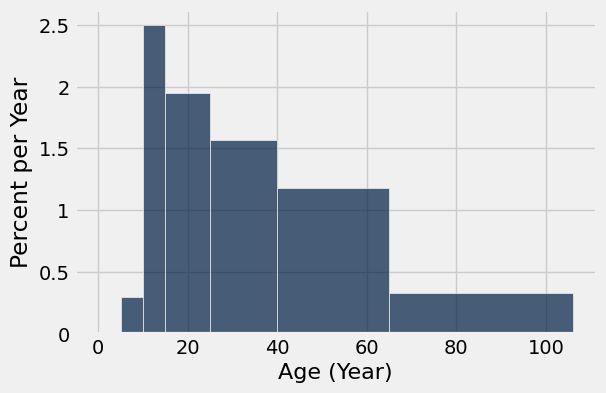

In [29]:
# Let's make our first histogram!
# .hist() does all of that automatically
# the 'bins' argument is optional; you can pass in your pre-determined bins with that argument
# the 'unit' argument is also optional; but recommended just for visual certainty
top_movies.hist('Age', bins = my_bins, unit = 'Year')
plots.show();

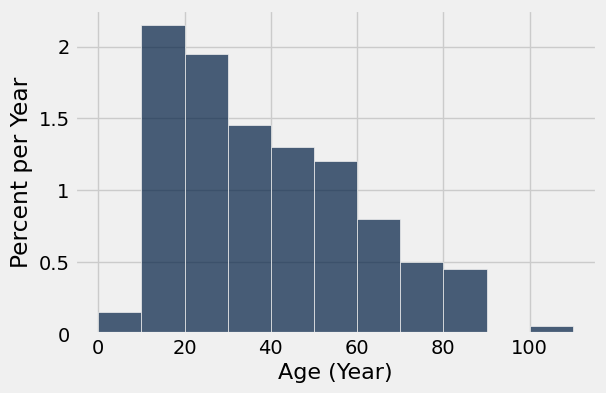

In [32]:
# Let's try equally spaced bins instead.
# we'll pass bins in using np.arange() because that will give us equally-spaced bins
top_movies.hist('Age', bins = np.arange(0, 111, 10), unit = 'Year')
plots.show();

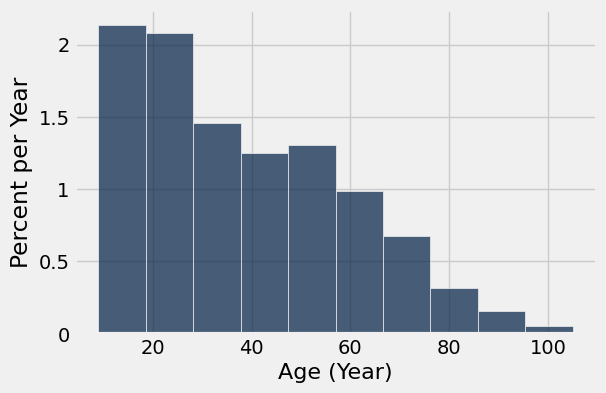

In [33]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit = 'Year')
plots.show();

(slides)

## Height ##

### Question: What is the height of the [40, 65] bin?

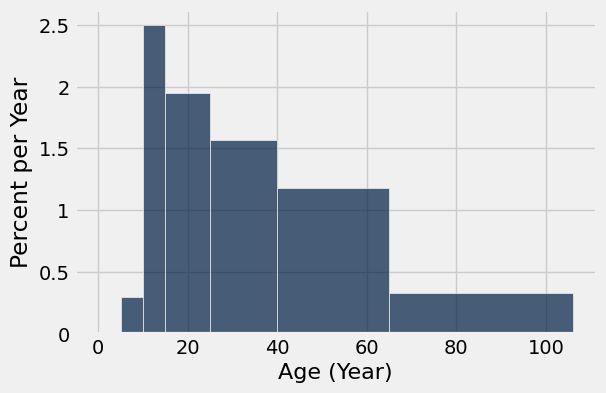

In [34]:
top_movies.hist('Age', bins=my_bins, unit='Year') # histogram with the uneven bins
plots.show();

In [37]:
# Step 1: Calculate % of movies in the [40, 65) bin
# bin is defined by the lower bound
# so we need to grab the row with the lower bound
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

29.5

In [ ]:
# To get "percent per year" - remember that the word "per" is basically an english word for "divided by"
# so, we need to calculate percent / years

In [39]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40
width

25

In [40]:
# Remember, Area = Percent
# Therefore, we use the following steps to get the height of the bar:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.18

### What are the heights of the rest of the bins?

In [41]:
binned_data

bin,Age count,Percent
0,0,0
5,3,1.5
10,25,12.5
15,39,19.5
25,47,23.5
40,59,29.5
65,27,13.5
106,0,0


In [42]:
np.arange(binned_data.num_rows - 1)

array([0, 1, 2, 3, 4, 5, 6])

In [43]:
# You can programmatically calculate the heights of the rest of the bins
# So this basically completes what .hist() does "under the hood"

# First: Get the bin "lefts"
# aka the lower bounds, or the left bounds of each bin
# using .take() to take all but the last row of this table
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1)) # All but the last row
bin_lefts

bin,Age count,Percent
0,0,0
5,3,1.5
10,25,12.5
15,39,19.5
25,47,23.5
40,59,29.5
65,27,13.5


In [44]:
np.diff(make_array(20, 10, 0))

array([-10, -10])

In [45]:
# Next: Get the bin widths
# np.diff gives the difference between consecutive values in an array
# For an array (20, 10, 0), np.diff would return (-10, -10)
bin_widths = np.diff(binned_data.column('bin')) # Difference between consecutive bin lefts
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [46]:
bin_lefts

bin,Age count,Percent,Width
0,0,0,5
5,3,1.5,5
10,25,12.5,5
15,39,19.5,10
25,47,23.5,15
40,59,29.5,25
65,27,13.5,41


In [47]:
# Get the bin heights
# recall height = percent / width
bin_heights = bin_lefts.column('Percent') / bin_widths # this gives an array
bin_heights

array([ 0.        ,  0.3       ,  2.5       ,  1.95      ,  1.56666667,
        1.18      ,  0.32926829])

In [48]:
bin_lefts = bin_lefts.with_column('Height', bin_heights)
bin_lefts

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,3,1.5,5,0.3
10,25,12.5,5,2.5
15,39,19.5,10,1.95
25,47,23.5,15,1.56667
40,59,29.5,25,1.18
65,27,13.5,41,0.329268


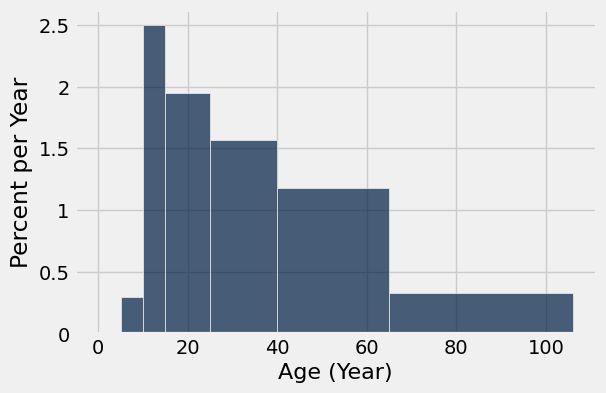

In [49]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')
plots.show();